<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/7_cov_corr_XmulY_XplusY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

from math import exp, sqrt


In [17]:
sample_x = stats.norm(3, 1).rvs(500, random_state=101)
sample_y = stats.norm(7, 1.2).rvs(500, random_state=102)
#sample_x = stats.poisson(3).rvs(500, random_state=101)
#sample_y = stats.poisson(5).rvs(500, random_state=102)
#sample_x = stats.uniform(1,4).rvs(500, random_state=101)
#sample_y = stats.uniform(4,7).rvs(500, random_state=102)

In [18]:
def plot_XY_jointplot(x, y, label=""):
    tmp = pd.DataFrame({"X": x, "Y": y})
    p = sns.jointplot(data=tmp, x="X", y="Y", kind='reg', height=4)
    p.fig.suptitle(f"{label} Corr: {tmp.X.corr(tmp.Y, method='pearson'):.4f}, Spearman: {tmp.X.corr(tmp.Y, method='spearman'):.4f}")
    p.fig.tight_layout()
    p.fig.subplots_adjust(top=0.95)
    plt.show()
    print("\n")

    tmp["XY"] = tmp.X * tmp.Y
    tmp["X+Y"] = tmp.X + tmp.Y
    plt.figure(figsize=(15, 10))
    ax1 = plt.subplot(2, 2, 1)
    sns.histplot(tmp, ax=ax1, stat="density", hue_order=['X', 'Y', 'X+Y', 'XY'], kde=True)
    ax1.set_title("Samples histograms")
    ax1.set_xlabel("random value")
    #ax1.set_ylabel("")

    legend = ax1.get_legend()
    handles = legend.legend_handles
    ax1.legend(handles, [
                         f"E(X): {tmp.X.mean():.4f}, Var(X): {tmp.X.var():.4f}",
                         f"E(Y): {tmp.Y.mean():.4f}, Var(Y): {tmp.Y.var():.4f}",
                         f"E(X+Y): {tmp['X+Y'].mean():.4f}, Var(X+Y): {tmp['X+Y'].var():.4f}",
                         f"E(XY): {tmp.XY.mean():.4f}, Var(XY): {tmp.XY.var():.4f}",
                         ], title='legend')


    #ax2 = plt.subplot(2, 2, 2)
    #x = np.linspace(-10, 30, 100)

    #ax2.plot(x, stats.norm(tmp.X.mean(), tmp.X.var()).pdf(x), label='X')
    #ax2.plot(x, stats.norm(tmp.Y.mean(), tmp.Y.var()).pdf(x), label='Y')
    #ax2.plot(x, stats.norm(tmp['X+Y'].mean(), tmp['X+Y'].var()).pdf(x), label='X+Y')
    #ax2.plot(x, stats.norm(tmp.XY.mean(), tmp.XY.var()).pdf(x), label='XY')
    #ax2.set_title("Normal distributions with sample E() and Var()")
    #ax2.set_ylabel('f')
    #ax2.set_xlabel('random value')
    #ax2.legend()

    plt.show()

    tmp["XY"] = tmp.X * tmp.Y
    tmp["X+Y"] = tmp.X + tmp.Y
    tmp["XXYY"] = tmp.X*tmp.Y*tmp.X*tmp.Y
    print(f"CORR Pearson: {tmp.X.corr(tmp.Y):.4f}")

    e_xy = tmp.X.mean() * tmp.Y.mean() + tmp.X.cov(tmp.Y)
    print(f"\nE(x+y): {tmp['X+Y'].mean():.4f} vs E(x)+E(y): {tmp.X.mean()+tmp.Y.mean():.4f}")
    print(f"Var(x+y): {tmp['X+Y'].var():.4f} vs Var(x)+Var(y)+2Cov(x,y): {tmp.X.var()+tmp.Y.var()+2*tmp.X.cov(tmp.Y):.4f}")
    print(f"E(xy): {(tmp.X*tmp.Y).mean():.4f} vs E(x)*E(y) + Cov(x,y): {e_xy:.4f}")
    print(f"Var(xy): {(tmp.X*tmp.Y).var():.4f} vs Var(XY)=E[X^2*Y^2]−(E[XY])^2: {tmp.XXYY.mean()-e_xy*e_xy:.4f}")


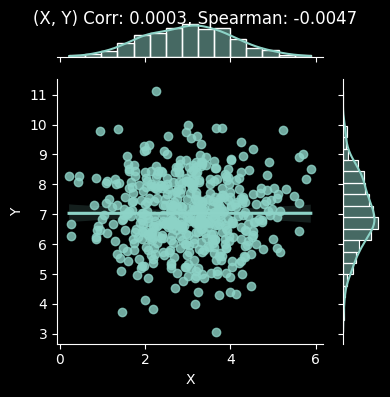

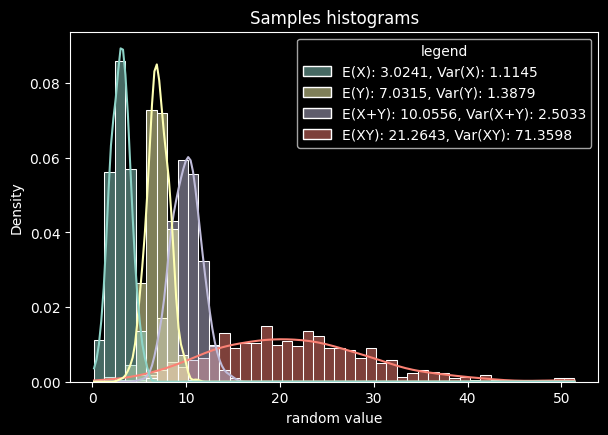

CORR Pearson: 0.0003

E(x+y): 10.0556 vs E(x)+E(y): 10.0556
Var(x+y): 2.5033 vs Var(x)+Var(y)+2Cov(x,y): 2.5033
E(xy): 21.2643 vs E(x)*E(y) + Cov(x,y): 21.2643
Var(xy): 71.3598 vs Var(XY)=E[X^2*Y^2]−(E[XY])^2: 71.2170


In [19]:
plot_XY_jointplot(x=sample_x, y=sample_y, label="(X, Y)")

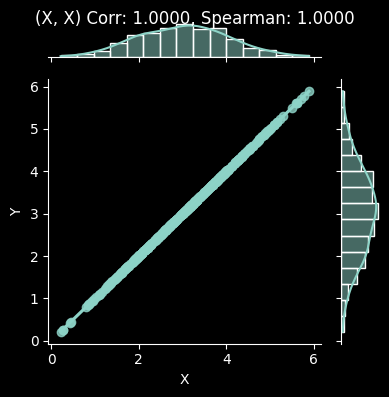

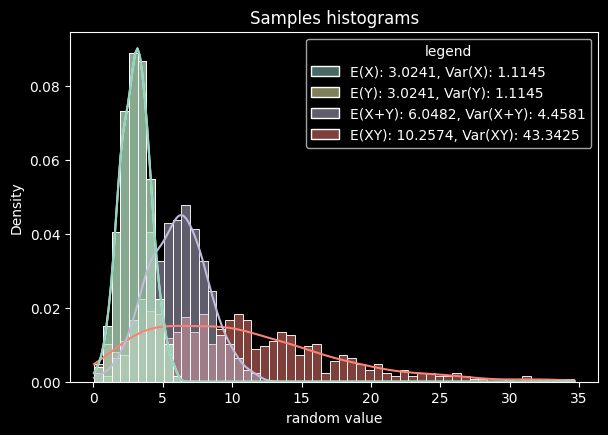

CORR Pearson: 1.0000

E(x+y): 6.0482 vs E(x)+E(y): 6.0482
Var(x+y): 4.4581 vs Var(x)+Var(y)+2Cov(x,y): 4.4581
E(xy): 10.2574 vs E(x)*E(y) + Cov(x,y): 10.2596
Var(xy): 43.3425 vs Var(XY)=E[X^2*Y^2]−(E[XY])^2: 43.2101


In [20]:
plot_XY_jointplot(x=sample_x, y=sample_x, label="(X, X)")

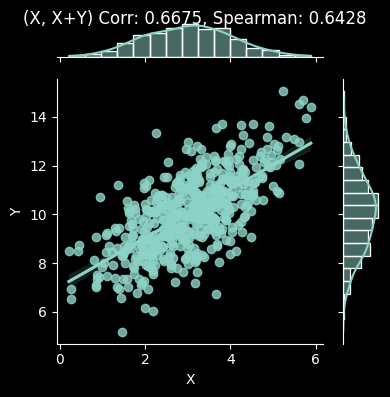

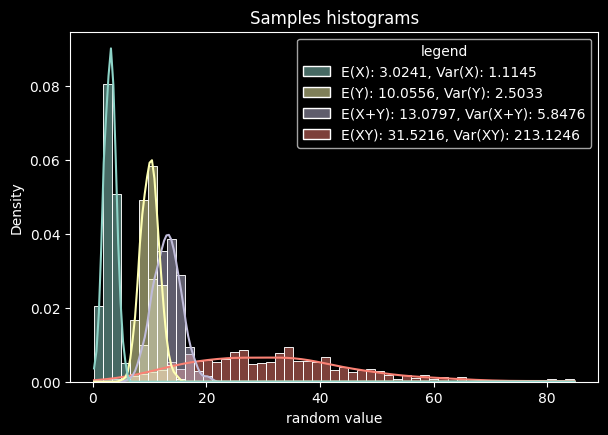

CORR Pearson: 0.6675

E(x+y): 13.0797 vs E(x)+E(y): 13.0797
Var(x+y): 5.8476 vs Var(x)+Var(y)+2Cov(x,y): 5.8476
E(xy): 31.5216 vs E(x)*E(y) + Cov(x,y): 31.5239
Var(xy): 213.1246 vs Var(XY)=E[X^2*Y^2]−(E[XY])^2: 212.5578


In [21]:
plot_XY_jointplot(x=sample_x, y=sample_x+sample_y, label="(X, X+Y)")

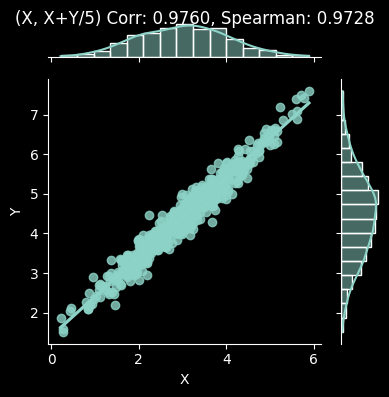

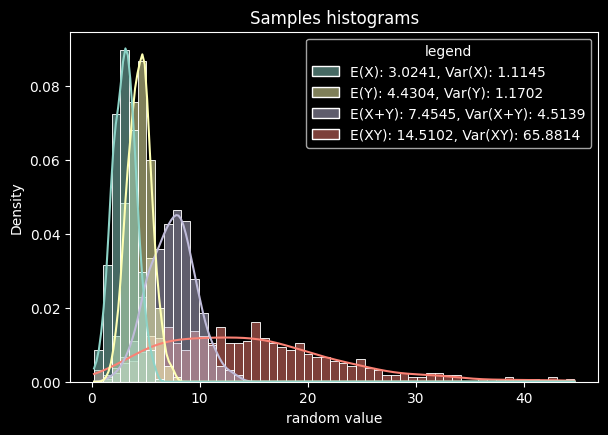

CORR Pearson: 0.9760

E(x+y): 7.4545 vs E(x)+E(y): 7.4545
Var(x+y): 4.5139 vs Var(x)+Var(y)+2Cov(x,y): 4.5139
E(xy): 14.5102 vs E(x)*E(y) + Cov(x,y): 14.5125
Var(xy): 65.8814 vs Var(XY)=E[X^2*Y^2]−(E[XY])^2: 65.6849


In [22]:
plot_XY_jointplot(x=sample_x, y=sample_x+sample_y/5, label="(X, X+Y/5)")

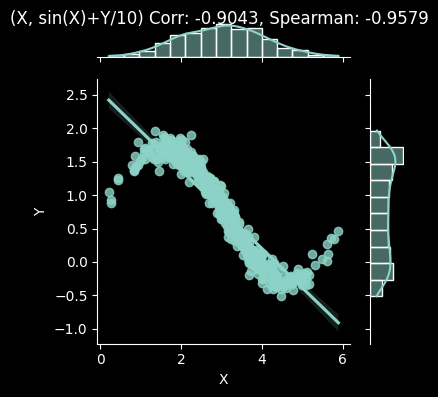

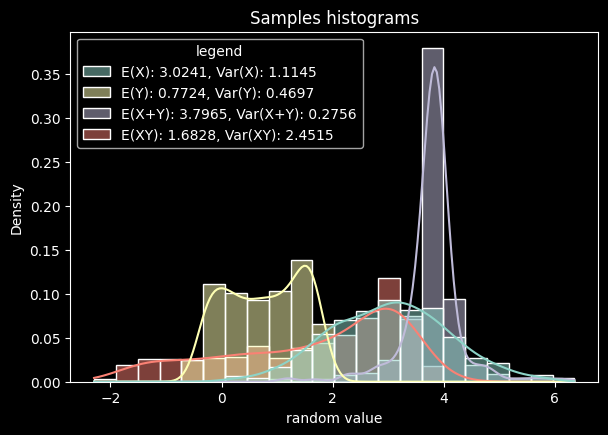

CORR Pearson: -0.9043

E(x+y): 3.7965 vs E(x)+E(y): 3.7965
Var(x+y): 0.2756 vs Var(x)+Var(y)+2Cov(x,y): 0.2756
E(xy): 1.6828 vs E(x)*E(y) + Cov(x,y): 1.6815
Var(xy): 2.4515 vs Var(XY)=E[X^2*Y^2]−(E[XY])^2: 2.4510


In [23]:
plot_XY_jointplot(x=sample_x, y=np.sin(sample_x)+sample_y/10, label="(X, sin(X)+Y/10)")

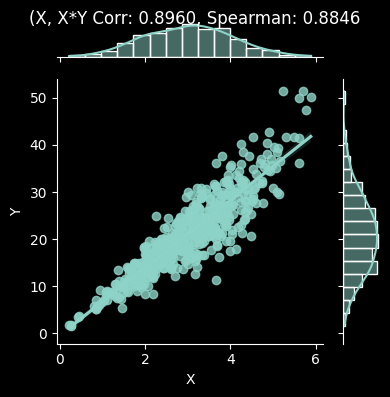

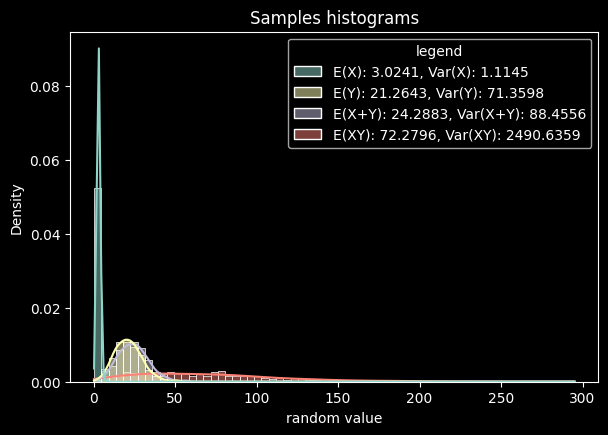

CORR Pearson: 0.8960

E(x+y): 24.2883 vs E(x)+E(y): 24.2883
Var(x+y): 88.4556 vs Var(x)+Var(y)+2Cov(x,y): 88.4556
E(xy): 72.2796 vs E(x)*E(y) + Cov(x,y): 72.2955
Var(xy): 2490.6359 vs Var(XY)=E[X^2*Y^2]−(E[XY])^2: 2483.3442


In [24]:
plot_XY_jointplot(x=sample_x, y=sample_x * sample_y, label="(X, X*Y")